In [82]:
import re
import nltk
import isodate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Youtube Data.csv", on_bad_lines='warn', engine='python')
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17196\1921998808.py:1: ParserWarning: Skipping line 403: unexpected end of data

  df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Youtube Data.csv", on_bad_lines='warn', engine='python')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17196\1921998808.py:1: ParserWarning: Skipping line 28: Expected 15 fields in line 28, saw 16

  df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Youtube Data.csv", on_bad_lines='warn', engine='python')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17196\1921998808.py:1: ParserWarning: Skipping line 43: Expected 15 fields in line 43, saw 16

  df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Youtube Data.csv", on_bad_lines='warn', engine='python')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17196\1921998808.py:1: ParserWarning: Skipping line 58: Expected 15 fields in line 58, saw 16

  df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Youtube Data.csv", on_bad_lines='warn', engine='python')
C:\Users\Lenovo\AppData\Local\Temp\ipy

,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,favorite_count,comment_count,duration,definition,caption
0,kZfz5UlsHlQ,"DARLING, I (Official Video)","directed by TYLER OKONMA\ndp: LUIS ""PANCH"" PER...",2025-08-19T17:09:11Z,UCsQBsZJltmLzlsJNG7HevBg,"Tyler, The Creator","chromakopia,tyler the creator,darling i,teezo ...",2,1042576,181841,0,13958,PT4M49S,hd,False
1,9txkGBj_trg,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,Call of Duty®: Black Ops 7 redefines the franc...,2025-08-19T18:08:38Z,UC9YydG57epLqxA9cTzZXSeQ,Call of Duty,"call of duty,cod,activision",20,5991411,25012,0,13127,PT2M20S,hd,False
2,HVC_dBNUZGc,gamescom Opening Night Live 2025,Live from Cologne – the big opening show of ga...,2025-08-19T20:15:33Z,UCHo_GVNoKNqfJx6zUGRd6YQ,gamescom,NaN,24,1540057,35942,0,667,PT3H14S,hd,False
3,5dA094oAy-g,Twenty One Pilots - Drum Show (Official Video),Official video for the new single “Drum Show” ...,2025-08-18T17:30:06Z,UCBQZwaNPFfJ1gZ1fLZpAEGw,twenty one pilots,"twenty one pilots,twenty one pilots official,n...",10,1973975,212769,0,14911,PT3M36S,hd,False
4,NZY5WiqeyQQ,Fallout Season 2 - Official Teaser Trailer | g...,"Watch the Season 2 Teaser Trailer for Fallout,...",2025-08-19T18:55:58Z,UCKy1dAqELo0zrOtPkf0eTMw,IGN,"ign,gamescom,gamescom 2025,game trailer,game t...",20,831185,58015,0,4846,PT2M43S,hd,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,4FFzWTaFb3hs,BAK Jay Feat. Chuckyy - Riding With That (Offi...,BAK Jay - Riding With That Ft. Chuckyy\nShot ...,2025-08-19T20:00:07Z,UC9n0bFMw6qvIEBPRnOSxwzw,B.A.K Jay,NaN,10,43678,5263,0,377,PT2M22S,hd,False
372,H4bq6P8e5gk,Bubsy 4D - Official Announcement Trailer,Bubsy's back baby and this time it's in 4D! Jo...,2025-08-19T17:40:18Z,UC33t-fSHCIFjvMUhWhJHX6g,Atari,NaN,20,214623,19542,0,4813,PT1M38S,hd,False
373,2qTcR8OE5AI,I Opened Another Grocery Store…,CaseOh X Starforge https://starforgepc.com/Ca...,2025-08-19T22:00:02Z,UC63anZxfVGHUEmfBAf5w7pw,CaseOh,"gaming,caseoh,caseohgames,case,funny,streamer,...",20,146444,10967,0,1050,PT1H3M26S,hd,False
374,HGo6poEydWs,THF LIL LAW - BLASIAN DOLL,Sounds like laws back With the track Blasian d...,2025-08-19T19:45:26Z,UCpbVuAz2yFpNVp0V55ksbXw,THF LIL LAW,NaN,10,26095,1735,0,45,PT2M14S,hd,False


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        376 non-null    object
 1   title           376 non-null    object
 2   description     376 non-null    object
 3   published_at    376 non-null    object
 4   channel_id      376 non-null    object
 5   channel_title   376 non-null    object
 6   tags            243 non-null    object
 7   category_id     376 non-null    int64 
 8   view_count      376 non-null    int64 
 9   like_count      376 non-null    int64 
 10  favorite_count  376 non-null    int64 
 11  comment_count   376 non-null    int64 
 12  duration        376 non-null    object
 13  definition      376 non-null    object
 14  caption         376 non-null    bool  
dtypes: bool(1), int64(5), object(9)
memory usage: 41.6+ KB


In [86]:
df.video_id.nunique()

28

In [87]:
df.title.nunique()

27

In [88]:
df.channel_id.nunique()

27

In [89]:
df.channel_title.nunique()

27

In [90]:
df.tags.nunique()

20

In [91]:
df.category_id.nunique()

5

In [92]:
df.category_id.unique()

array([ 2, 20, 24, 10,  1])

In [93]:
df.definition.unique()

array(['hd'], dtype=object)

In [94]:
df.describe()

,category_id,view_count,like_count,favorite_count,comment_count
count,376.000000,3.760000e+02,376.00000,376.0,376.000000
mean,13.747340,3.847002e+05,20558.87500,0.0,1725.598404
std,6.942237,5.596647e+05,25777.93542,0.0,1811.052962
min,1.000000,2.609500e+04,156.00000,0.0,0.000000
25%,10.000000,1.464440e+05,5263.00000,0.0,377.000000
50%,20.000000,2.060280e+05,12547.00000,0.0,1481.000000
75%,20.000000,3.457330e+05,19542.00000,0.0,2520.000000
max,24.000000,5.991411e+06,212769.00000,0.0,14911.000000


In [95]:
df['category_id'] = df['category_id'].astype(str)

In [96]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [98]:
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df.published_at.dtype

datetime64[ns, UTC]

In [99]:
def duration_minutes(data):
    time_delta = isodate.parse_duration(data)
    return time_delta.seconds/60

In [100]:
duration_minutes('PT3H14S')

180.23333333333332

In [101]:
df['duration_minutes'] = df.duration.apply(lambda x: duration_minutes(x))
df.head()

,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,favorite_count,comment_count,duration,definition,caption,duration_minutes
0,kZfz5UlsHlQ,"DARLING, I (Official Video)","directed by TYLER OKONMA\ndp: LUIS ""PANCH"" PER...",2025-08-19 17:09:11+00:00,UCsQBsZJltmLzlsJNG7HevBg,"Tyler, The Creator","chromakopia,tyler the creator,darling i,teezo ...",2,1042576,181841,0,13958,PT4M49S,hd,False,4.816667
1,9txkGBj_trg,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,Call of Duty®: Black Ops 7 redefines the franc...,2025-08-19 18:08:38+00:00,UC9YydG57epLqxA9cTzZXSeQ,Call of Duty,"call of duty,cod,activision",20,5991411,25012,0,13127,PT2M20S,hd,False,2.333333
2,HVC_dBNUZGc,gamescom Opening Night Live 2025,Live from Cologne – the big opening show of ga...,2025-08-19 20:15:33+00:00,UCHo_GVNoKNqfJx6zUGRd6YQ,gamescom,NaN,24,1540057,35942,0,667,PT3H14S,hd,False,180.233333
3,5dA094oAy-g,Twenty One Pilots - Drum Show (Official Video),Official video for the new single “Drum Show” ...,2025-08-18 17:30:06+00:00,UCBQZwaNPFfJ1gZ1fLZpAEGw,twenty one pilots,"twenty one pilots,twenty one pilots official,n...",10,1973975,212769,0,14911,PT3M36S,hd,False,3.600000
4,NZY5WiqeyQQ,Fallout Season 2 - Official Teaser Trailer | g...,"Watch the Season 2 Teaser Trailer for Fallout,...",2025-08-19 18:55:58+00:00,UCKy1dAqELo0zrOtPkf0eTMw,IGN,"ign,gamescom,gamescom 2025,game trailer,game t...",20,831185,58015,0,4846,PT2M43S,hd,False,2.716667


In [103]:
df.tags[4]

'ign,gamescom,gamescom 2025,game trailer,game trailers,trailer,trailers,gaming,video games,video game trailer,video game trailers,new game trailers,new video game trailers,upcoming video games,new video games 2025,upcoming video games 2025,Fallout - Season 2 Teaser Trailer,fallout season 2'

In [105]:
df['tag_list'] = df['tags'].str.split(',')
df.tag_list[4]

['ign',
 'gamescom',
 'gamescom 2025',
 'game trailer',
 'game trailers',
 'trailer',
 'trailers',
 'gaming',
 'video games',
 'video game trailer',
 'video game trailers',
 'new game trailers',
 'new video game trailers',
 'upcoming video games',
 'new video games 2025',
 'upcoming video games 2025',
 'Fallout - Season 2 Teaser Trailer',
 'fallout season 2']

In [106]:
top_videos_unique = df.groupby("title", as_index=False).agg({
    "view_count": "max",
    "like_count": "max",    
    "comment_count": "max",
    "favorite_count": "max"
}).sort_values(by=["view_count", "like_count", "comment_count", "favorite_count"], ascending=False)

top_videos_unique.head()

,title,view_count,like_count,comment_count,favorite_count
3,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,5991411,25012,13127,0
2,CORTIS (코르티스) 'What You Want' Official MV,5019274,102987,7038,0
21,Twenty One Pilots - Drum Show (Official Video),1973975,212769,14911,0
23,We PEAKed too hard...,1596740,73814,2520,0
25,gamescom Opening Night Live 2025,1540057,35942,667,0


In [107]:
df.favorite_count.nunique()

1

In [111]:
df.drop(columns='favorite_count', inplace=True)


C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


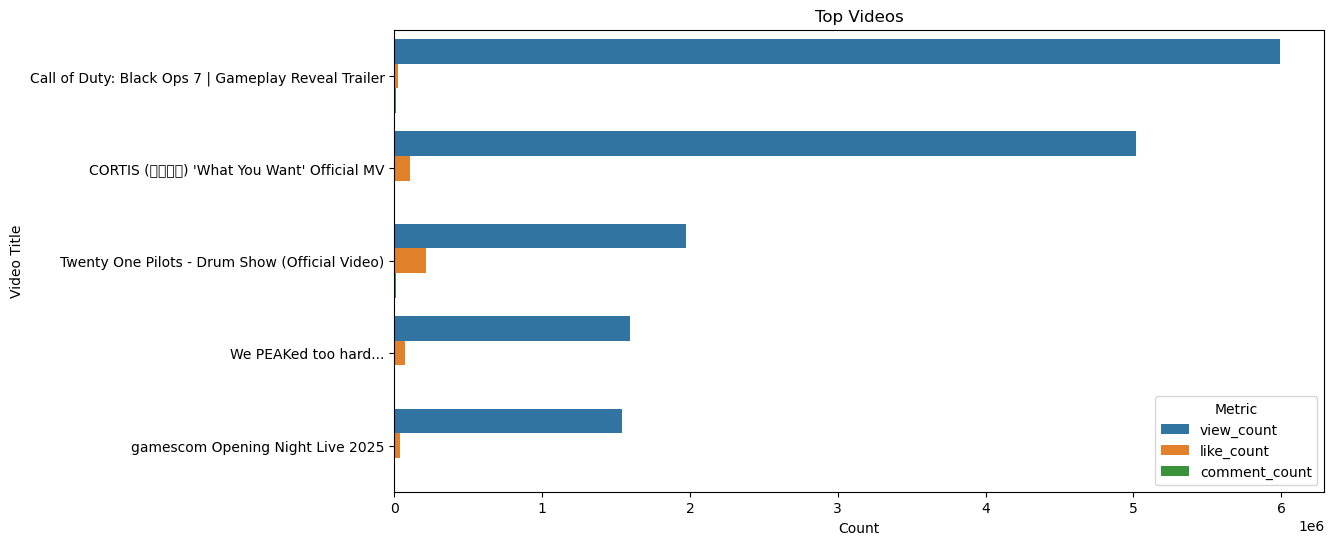

In [113]:
top_unique = top_videos_unique.nlargest(5, "view_count")

# Reshape into long format for seaborn
df_melted = top_unique.melt(id_vars="title",
                       value_vars=["view_count", "like_count", "comment_count"],
                       var_name="metric", value_name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, y="title", x="count", hue="metric")
plt.title("Top Videos")
plt.xlabel("Count")
plt.ylabel("Video Title")
plt.legend(title="Metric")
plt.show()

In [114]:
df_melted

,title,metric,count
0,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,view_count,5991411
1,CORTIS (코르티스) 'What You Want' Official MV,view_count,5019274
2,Twenty One Pilots - Drum Show (Official Video),view_count,1973975
3,We PEAKed too hard...,view_count,1596740
4,gamescom Opening Night Live 2025,view_count,1540057
5,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,like_count,25012
6,CORTIS (코르티스) 'What You Want' Official MV,like_count,102987
7,Twenty One Pilots - Drum Show (Official Video),like_count,212769
8,We PEAKed too hard...,like_count,73814
9,gamescom Opening Night Live 2025,like_count,35942


In [116]:
top_videos_unique = df.groupby("category_id", as_index=False).agg({
    "view_count": "max",
    "like_count": "max",    
    "comment_count": "max"
    
}).sort_values(by=["view_count", "like_count", "comment_count"], ascending=False)

top_videos_unique.head()

,category_id,view_count,like_count,comment_count
3,20,5991411,89275,13127
1,10,5019274,212769,14911
4,24,1540057,35942,667
2,2,1042576,181841,13958
0,1,947397,95998,5654


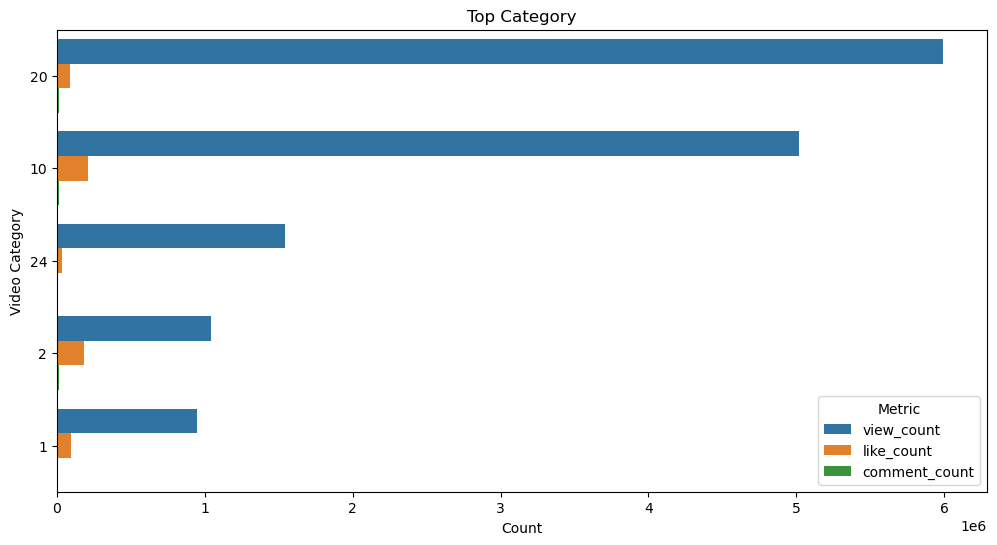

In [118]:
top_unique = top_videos_unique.nlargest(5, "view_count")

# Reshape into long format for seaborn
df_melted = top_unique.melt(id_vars="category_id",
                       value_vars=["view_count", "like_count", "comment_count"],
                       var_name="metric", value_name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, y="category_id", x="count", hue="metric")
plt.title("Top Category")
plt.xlabel("Count")
plt.ylabel("Video Category")
plt.legend(title="Metric")
plt.show()

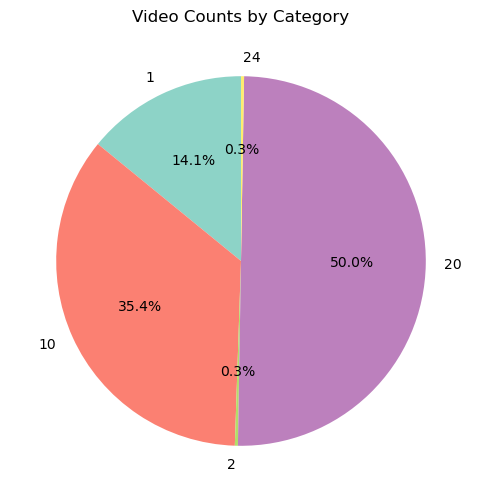

In [119]:
counts = df['category_id'].value_counts().sort_index()
counts.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90, cmap='Set3')
plt.ylabel("")  # remove y-label
plt.title("Video Counts by Category")
plt.show()

In [121]:
top_videos_unique = df.groupby("channel_title", as_index=False).agg({
    "view_count": "max",
    "like_count": "max",    
    "comment_count": "max"
}).sort_values(by=["view_count", "like_count", "comment_count"], ascending=False)

top_videos_unique.head()

,channel_title,view_count,like_count,comment_count
2,Call of Duty,5991411,25012,13127
5,HYBE LABELS,5019274,102987,7038
26,twenty one pilots,1973975,212769,14911
16,SMii7Y,1596740,73814,2520
25,gamescom,1540057,35942,667


In [122]:
category_24_videos = df[df['category_id'] == 24]


In [123]:
category_24_videos.head()


,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,definition,caption,duration_minutes,tag_list


In [127]:
df['category_id'] = df['category_id'].astype(int)
category_24_videos = df[df['category_id'] == 24]

In [128]:
print(f"Total videos in category 24: {len(category_24_videos)}")
category_24_videos.head()


Total videos in category 24: 1


,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,definition,caption,duration_minutes,tag_list
2,HVC_dBNUZGc,gamescom Opening Night Live 2025,Live from Cologne – the big opening show of ga...,2025-08-19 20:15:33+00:00,UCHo_GVNoKNqfJx6zUGRd6YQ,gamescom,NaN,24,1540057,35942,667,PT3H14S,hd,False,180.233333,NaN


In [136]:
df['category_id'] = df['category_id'].astype(int)
category_1_videos = df[df['category_id'] == 1]

In [137]:
print(f"Total videos in category 2: {len(category_1_videos)}")
category_1_videos.head()

Total videos in category 2: 53


,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,definition,caption,duration_minutes,tag_list
7,IRjuAemfaQE,Sekiro: No Defeat | Official Trailer | Crunchy...,Sekiro: No Defeat is coming exclusively to Cru...,2025-08-19 18:19:17+00:00,UC6pGDc4bFGD1_36IKv3FnYg,Crunchyroll,"sekiro,sekiro anime,sekiro shadows die twice,s...",1,947397,95998,5654,PT1M13S,hd,False,1.216667,"[sekiro, sekiro anime, sekiro shadows die twic..."
19,SLahR0K8Fss,Honest Trailers | War of the Worlds (2025),It’s the Honest Trailer for War of the Worlds ...,2025-08-19 17:00:38+00:00,UCOpcACMWblDls9Z6nax0fr0Wfc048g,Screen Junkies,NaN,1,190198,12457,1481,PT9M42S,hd,False,9.700000,NaN
25,q4-CRkd_74g,Good Boy - Official Trailer | HD | IFC Films,A loyal dog moves to a rural family home with ...,2025-08-18 16:30:28+00:00,UCOn923UnbV8H9zo_lO6ZCRw,IFC Films,"Good Boy,Goodboy,Good Boy movie,Goodboy movie,...",1,372690,11896,1145,PT1M42S,hd,False,1.700000,"[Good Boy, Goodboy, Good Boy movie, Goodboy mo..."
33,SLahR0K8Fss,Honest Trailers | War of the Worlds (2025),It’s the Honest Trailer for War of the Worlds ...,2025-08-19 17:00:38+00:00,UCOpcACMWblDls9Z6nax0fr0Wfc048g,Screen Junkies,NaN,1,190198,12457,1481,PT9M42S,hd,False,9.700000,NaN
39,q4-CRkd_74g,Good Boy - Official Trailer | HD | IFC Films,A loyal dog moves to a rural family home with ...,2025-08-18 16:30:28+00:00,UCOn923UnbV8H9zo_lO6ZCRw,IFC Films,"Good Boy,Goodboy,Good Boy movie,Goodboy movie,...",1,372690,11896,1145,PT1M42S,hd,False,1.700000,"[Good Boy, Goodboy, Good Boy movie, Goodboy mo..."


In [129]:
df[['title', 'category_id']]


,title,category_id
0,"DARLING, I (Official Video)",2
1,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,20
2,gamescom Opening Night Live 2025,24
3,Twenty One Pilots - Drum Show (Official Video),10
4,Fallout Season 2 - Official Teaser Trailer | g...,20
...,...,...
371,BAK Jay Feat. Chuckyy - Riding With That (Offi...,10
372,Bubsy 4D - Official Announcement Trailer,20
373,I Opened Another Grocery Store…,20
374,THF LIL LAW - BLASIAN DOLL,10


In [131]:
categories = [1, 2, 10, 20, 24]
filtered = df[df['category_id'].astype(int).isin(categories)]
filtered[['title', 'category_id']]



,title,category_id
0,"DARLING, I (Official Video)",2
1,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,20
2,gamescom Opening Night Live 2025,24
3,Twenty One Pilots - Drum Show (Official Video),10
4,Fallout Season 2 - Official Teaser Trailer | g...,20
...,...,...
371,BAK Jay Feat. Chuckyy - Riding With That (Offi...,10
372,Bubsy 4D - Official Announcement Trailer,20
373,I Opened Another Grocery Store…,20
374,THF LIL LAW - BLASIAN DOLL,10


In [133]:
filtered[['title', 'category_id']].head(10)



,title,category_id
0,"DARLING, I (Official Video)",2
1,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,20
2,gamescom Opening Night Live 2025,24
3,Twenty One Pilots - Drum Show (Official Video),10
4,Fallout Season 2 - Official Teaser Trailer | g...,20
5,Kirby Air Riders Direct 8.19.2025,20
6,Nino Paid - 3 Peat (ft. 1900Rugrat and VonOff1...,10
7,Sekiro: No Defeat | Official Trailer | Crunchy...,1
8,steal a brainrot admin abuse (taco tuesday),20
9,T-Pain - Bartender (Lyrics) ft. Akon,10


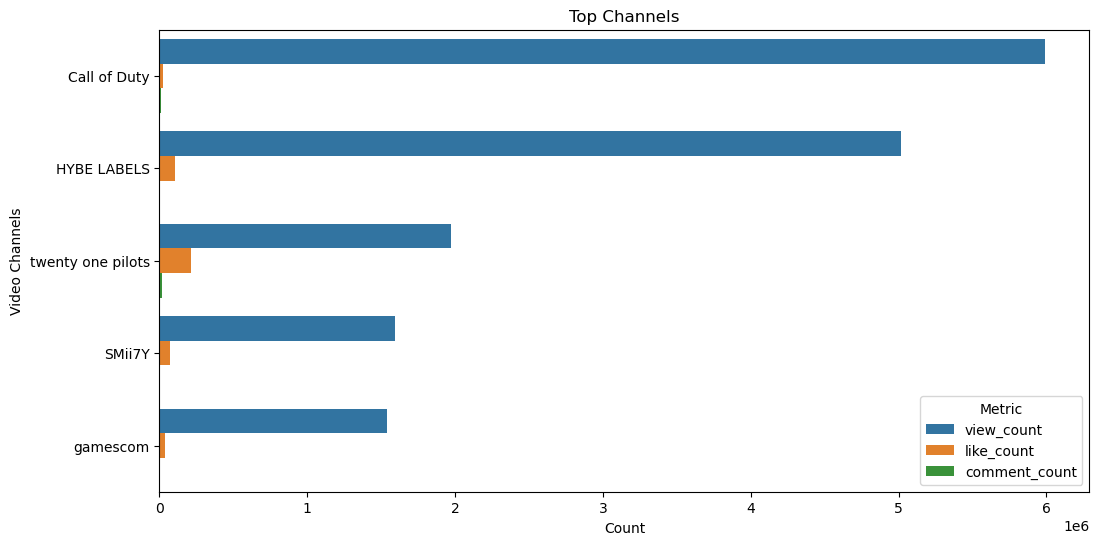

In [139]:
top_unique = top_videos_unique.nlargest(5, "view_count")

# Reshape into long format for seaborn
df_melted = top_unique.melt(id_vars="channel_title",
                       value_vars=["view_count", "like_count", "comment_count"],
                       var_name="metric", value_name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, y="channel_title", x="count", hue="metric")
plt.title("Top Channels")
plt.xlabel("Count")
plt.ylabel("Video Channels")
plt.legend(title="Metric")
plt.show()

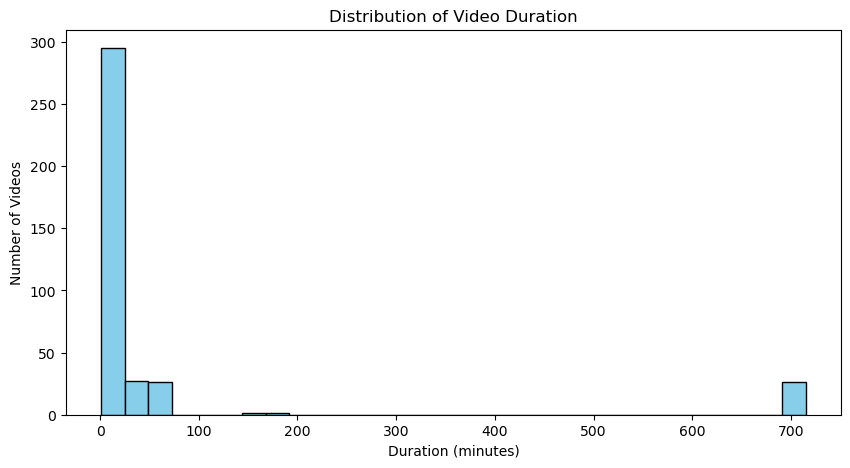

In [140]:
plt.figure(figsize=(10,5))
plt.hist(df['duration_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Duration")
plt.show()

In [142]:
# Filter videos longer than or equal to 700 minutes
long_videos = df[df['duration_minutes'] >= 700]

# Count them
num_long_videos = len(long_videos)
print(f"Number of videos with duration >= 700 minutes: {num_long_videos}")

# Display their titles and durations
print(long_videos[['title', 'duration_minutes']])


Number of videos with duration >= 700 minutes: 26
                                                 title  duration_minutes
17   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
31   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
45   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
59   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
73   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
87   \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
101  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
115  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
129  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
143  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
157  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
171  \ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 F...        714.983333
1

In [143]:
for title in long_videos['title']:
    print(title)


\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)
\ud83d\udd34 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE!

In [144]:
df.describe()

,category_id,view_count,like_count,comment_count,duration_minutes
count,376.000000,3.760000e+02,376.00000,376.000000,376.000000
mean,13.747340,3.847002e+05,20558.87500,1725.598404,59.944193
std,6.942237,5.596647e+05,25777.93542,1811.052962,179.968039
min,1.000000,2.609500e+04,156.00000,0.000000,1.016667
25%,10.000000,1.464440e+05,5263.00000,377.000000,1.666667
50%,20.000000,2.060280e+05,12547.00000,1481.000000,2.533333
75%,20.000000,3.457330e+05,19542.00000,2520.000000,9.700000
max,24.000000,5.991411e+06,212769.00000,14911.000000,714.983333


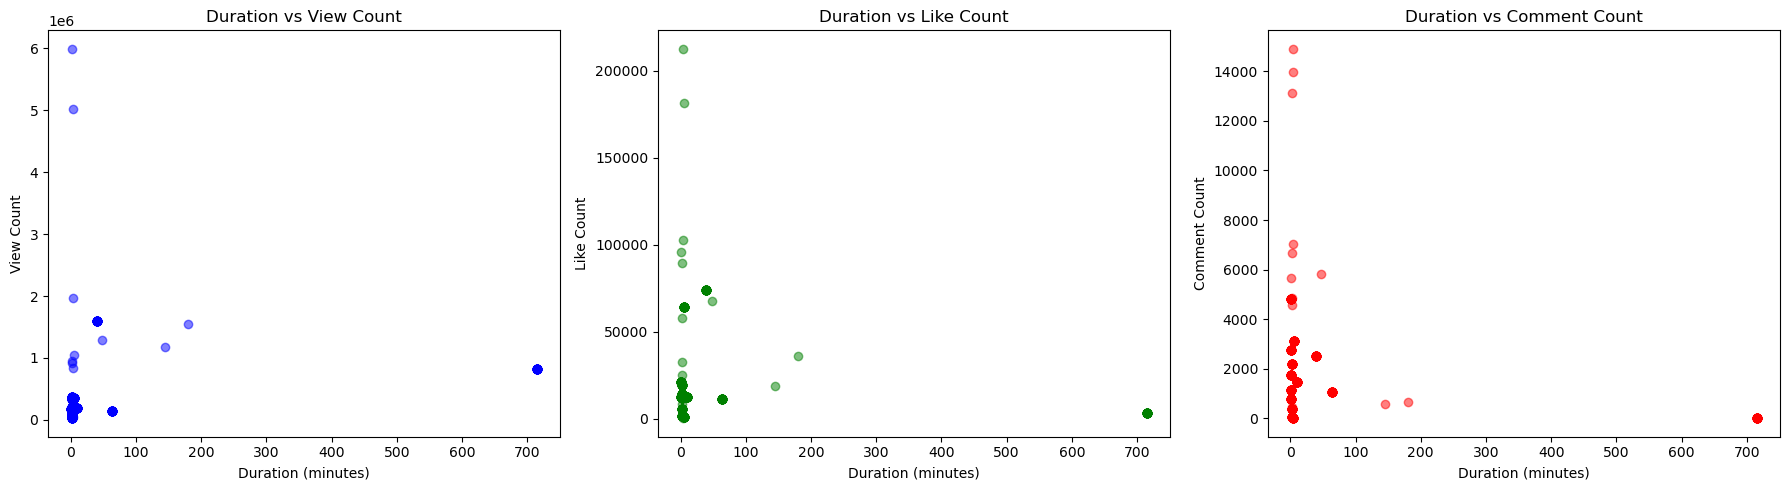

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
# flatten() not needed here because it's already 1D array

# Plot 1: View Count
axes[0].scatter(df['duration_minutes'], df['view_count'], alpha=0.5, color='blue')
axes[0].set_xlabel("Duration (minutes)")
axes[0].set_ylabel("View Count")
axes[0].set_title("Duration vs View Count")
# axes[0].set_yscale('log')  # optional log scale for better visualization

# Plot 2: Like Count
axes[1].scatter(df['duration_minutes'], df['like_count'], alpha=0.5, color='green')
axes[1].set_xlabel("Duration (minutes)")
axes[1].set_ylabel("Like Count")
axes[1].set_title("Duration vs Like Count")
# axes[1].set_yscale('log')

# Plot 3: Comment Count
axes[2].scatter(df['duration_minutes'], df['comment_count'], alpha=0.5, color='red')
axes[2].set_xlabel("Duration (minutes)")
axes[2].set_ylabel("Comment Count")
axes[2].set_title("Duration vs Comment Count")
# axes[2].set_yscale('log')

plt.tight_layout()
plt.show()


In [147]:
most_viewed = df.loc[df['view_count'].idxmax()]
print("Most viewed video title:", most_viewed['title'])
print("View count:", most_viewed['view_count'])


Most viewed video title: Call of Duty: Black Ops 7 | Gameplay Reveal Trailer
View count: 5991411


In [148]:
all_tags = [
    tag.strip().lower()
    for sublist in df['tag_list']
    if isinstance(sublist, list)  # skip NaN or non-lists
    for tag in sublist
]

tag_counts = Counter(all_tags)
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
top_tags = tag_counts_df.sort_values(by='count', ascending=False).head(10)
top_tags

,tag,count
44,gaming,53
62,rpg,53
161,por amarte así,52
45,video games,28
60,action,27
196,caseoh,26
198,case,26
199,funny,26
200,streamer,26
201,horror,26


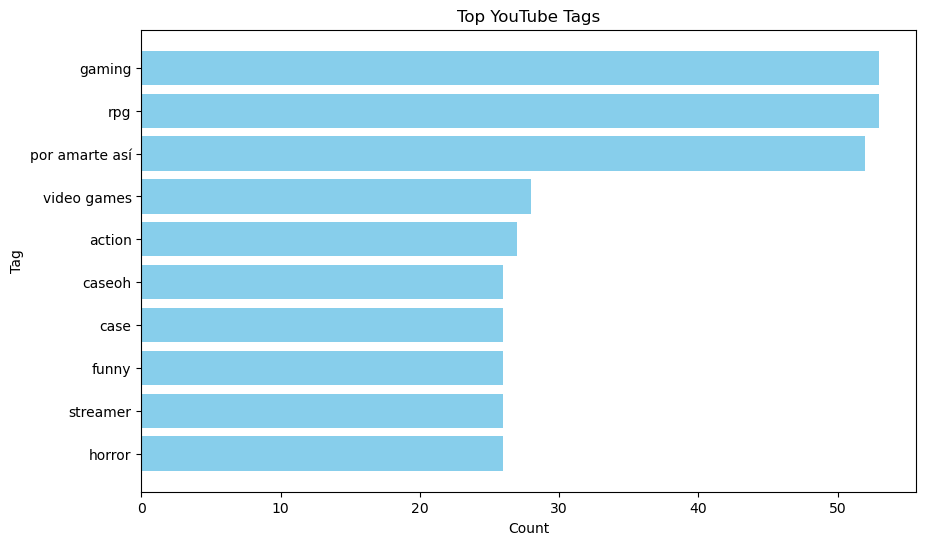

In [149]:
plt.figure(figsize=(10,6))
plt.barh(top_tags['tag'], top_tags['count'], color='skyblue')
plt.xlabel("Count")
plt.ylabel("Tag")
plt.title("Top YouTube Tags")
plt.gca().invert_yaxis()  # largest on top
plt.show()

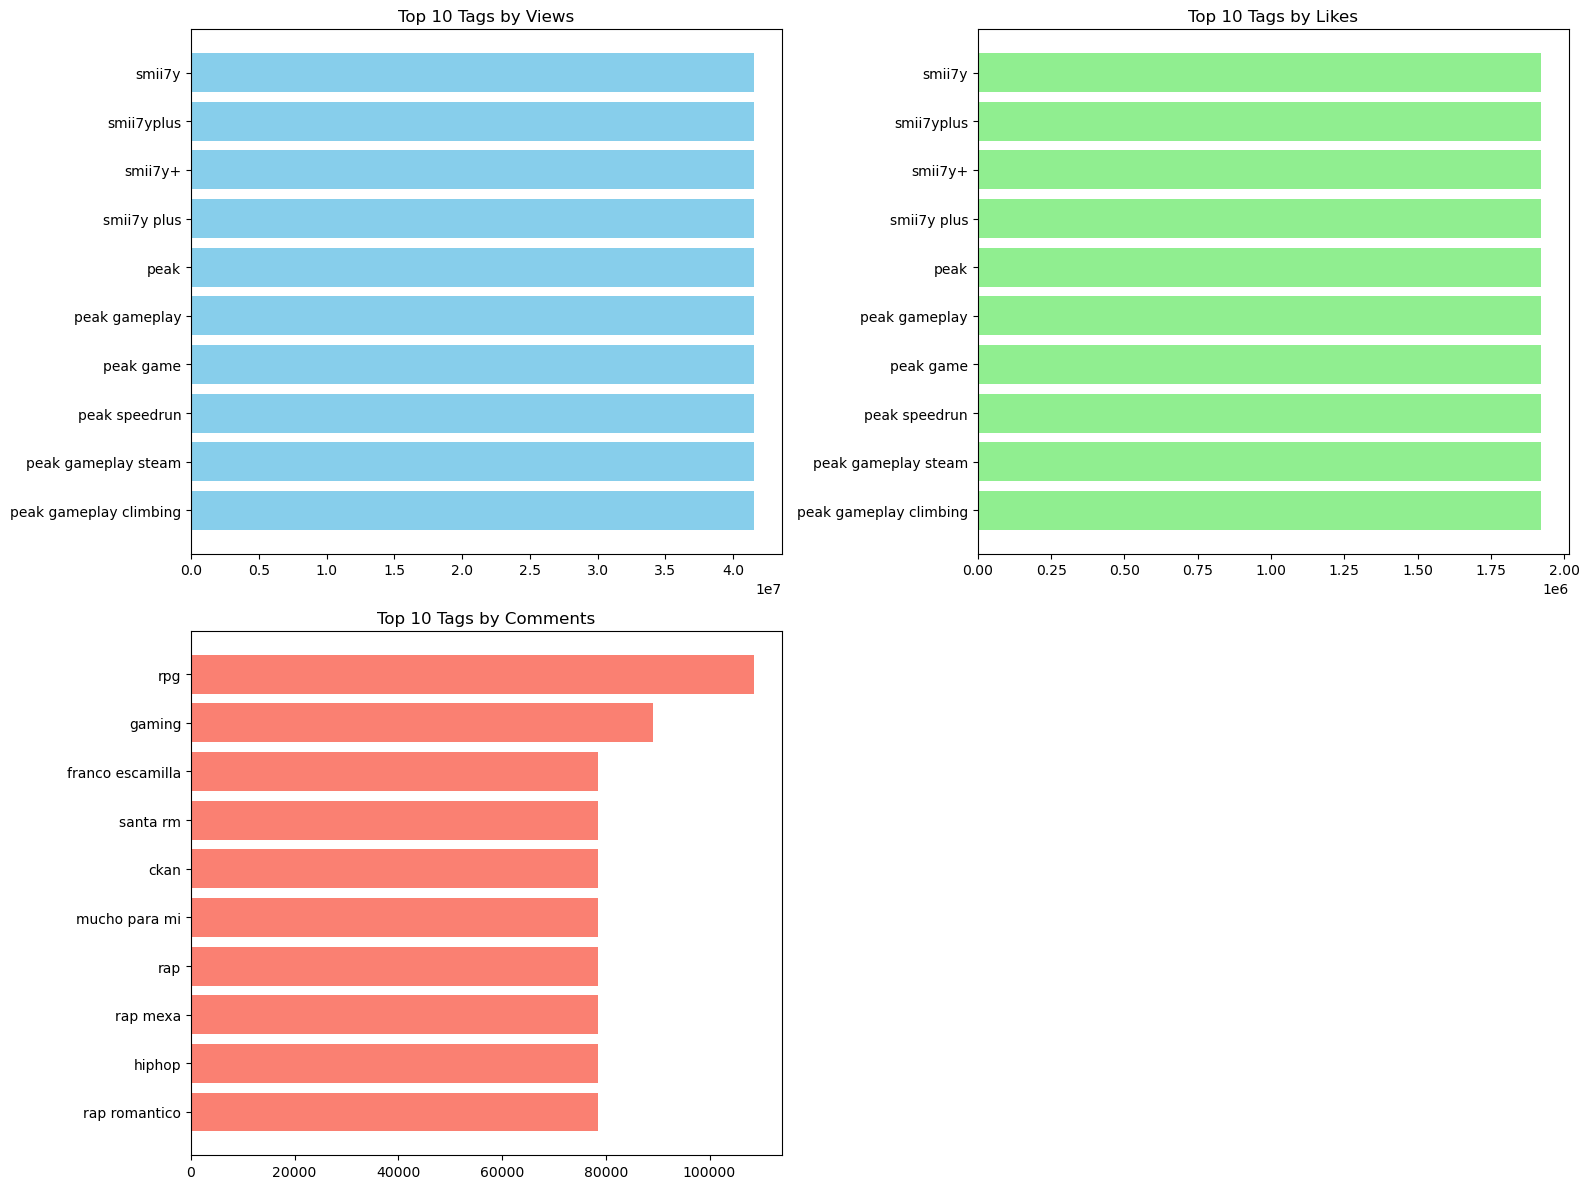

In [151]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# 1. Aggregate counts per tag
tag_view = defaultdict(int)
tag_like = defaultdict(int)
tag_comment = defaultdict(int)

for idx, row in df.iterrows():
    tags = row['tag_list']
    if isinstance(tags, list):
        for tag in tags:
            t = tag.strip().lower()
            tag_view[t] += row['view_count']
            tag_like[t] += row['like_count']
            tag_comment[t] += row['comment_count']

# 2. Get top 10 tags for each metric
top10_view = Counter(tag_view).most_common(10)
top10_like = Counter(tag_like).most_common(10)
top10_comment = Counter(tag_comment).most_common(10)

# 3. Create subplots (2 rows, 2 columns → only using 3 of them)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Helper function to plot a horizontal bar chart
def plot_top_tags(top_list, ax, title, color):
    tags, counts = zip(*top_list)
    ax.barh(tags, counts, color=color)
    ax.set_title(title)
    ax.invert_yaxis()  # largest on top

# Plot each metric
plot_top_tags(top10_view, axes[0], "Top 10 Tags by Views", "skyblue")
plot_top_tags(top10_like, axes[1], "Top 10 Tags by Likes", "lightgreen")
plot_top_tags(top10_comment, axes[2], "Top 10 Tags by Comments", "salmon")

# Hide the unused 4th subplot
axes[3].axis('off')

plt.tight_layout()
plt.show()


In [152]:
df['published_at']

0     2025-08-19 17:09:11+00:00
1     2025-08-19 18:08:38+00:00
2     2025-08-19 20:15:33+00:00
3     2025-08-18 17:30:06+00:00
4     2025-08-19 18:55:58+00:00
                 ...           
371   2025-08-19 20:00:07+00:00
372   2025-08-19 17:40:18+00:00
373   2025-08-19 22:00:02+00:00
374   2025-08-19 19:45:26+00:00
375   2025-08-18 16:30:28+00:00
Name: published_at, Length: 376, dtype: datetime64[ns, UTC]

In [153]:
df['date'] = df['published_at'].dt.date
df['hour'] = df['published_at'].dt.hour
df

,video_id,title,description,published_at,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,definition,caption,duration_minutes,tag_list,date,hour
0,kZfz5UlsHlQ,"DARLING, I (Official Video)","directed by TYLER OKONMA\ndp: LUIS ""PANCH"" PER...",2025-08-19 17:09:11+00:00,UCsQBsZJltmLzlsJNG7HevBg,"Tyler, The Creator","chromakopia,tyler the creator,darling i,teezo ...",2,1042576,181841,13958,PT4M49S,hd,False,4.816667,"[chromakopia, tyler the creator, darling i, te...",2025-08-19,17
1,9txkGBj_trg,Call of Duty: Black Ops 7 | Gameplay Reveal Tr...,Call of Duty®: Black Ops 7 redefines the franc...,2025-08-19 18:08:38+00:00,UC9YydG57epLqxA9cTzZXSeQ,Call of Duty,"call of duty,cod,activision",20,5991411,25012,13127,PT2M20S,hd,False,2.333333,"[call of duty, cod, activision]",2025-08-19,18
2,HVC_dBNUZGc,gamescom Opening Night Live 2025,Live from Cologne – the big opening show of ga...,2025-08-19 20:15:33+00:00,UCHo_GVNoKNqfJx6zUGRd6YQ,gamescom,NaN,24,1540057,35942,667,PT3H14S,hd,False,180.233333,NaN,2025-08-19,20
3,5dA094oAy-g,Twenty One Pilots - Drum Show (Official Video),Official video for the new single “Drum Show” ...,2025-08-18 17:30:06+00:00,UCBQZwaNPFfJ1gZ1fLZpAEGw,twenty one pilots,"twenty one pilots,twenty one pilots official,n...",10,1973975,212769,14911,PT3M36S,hd,False,3.600000,"[twenty one pilots, twenty one pilots official...",2025-08-18,17
4,NZY5WiqeyQQ,Fallout Season 2 - Official Teaser Trailer | g...,"Watch the Season 2 Teaser Trailer for Fallout,...",2025-08-19 18:55:58+00:00,UCKy1dAqELo0zrOtPkf0eTMw,IGN,"ign,gamescom,gamescom 2025,game trailer,game t...",20,831185,58015,4846,PT2M43S,hd,False,2.716667,"[ign, gamescom, gamescom 2025, game trailer, g...",2025-08-19,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,4FFzWTaFb3hs,BAK Jay Feat. Chuckyy - Riding With That (Offi...,BAK Jay - Riding With That Ft. Chuckyy\nShot ...,2025-08-19 20:00:07+00:00,UC9n0bFMw6qvIEBPRnOSxwzw,B.A.K Jay,NaN,10,43678,5263,377,PT2M22S,hd,False,2.366667,NaN,2025-08-19,20
372,H4bq6P8e5gk,Bubsy 4D - Official Announcement Trailer,Bubsy's back baby and this time it's in 4D! Jo...,2025-08-19 17:40:18+00:00,UC33t-fSHCIFjvMUhWhJHX6g,Atari,NaN,20,214623,19542,4813,PT1M38S,hd,False,1.633333,NaN,2025-08-19,17
373,2qTcR8OE5AI,I Opened Another Grocery Store…,CaseOh X Starforge https://starforgepc.com/Ca...,2025-08-19 22:00:02+00:00,UC63anZxfVGHUEmfBAf5w7pw,CaseOh,"gaming,caseoh,caseohgames,case,funny,streamer,...",20,146444,10967,1050,PT1H3M26S,hd,False,63.433333,"[gaming, caseoh, caseohgames, case, funny, str...",2025-08-19,22
374,HGo6poEydWs,THF LIL LAW - BLASIAN DOLL,Sounds like laws back With the track Blasian d...,2025-08-19 19:45:26+00:00,UCpbVuAz2yFpNVp0V55ksbXw,THF LIL LAW,NaN,10,26095,1735,45,PT2M14S,hd,False,2.233333,NaN,2025-08-19,19


In [155]:
time_series = df.groupby('hour')[['view_count','like_count','comment_count']].sum()
print(time_series.head())

      view_count  like_count  comment_count
hour                                       
0          46089         156              0
13       2213980      157005          12492
15       5019274      102987           7038
16       9689940      309296          29770
17      13541897     1226584         192513


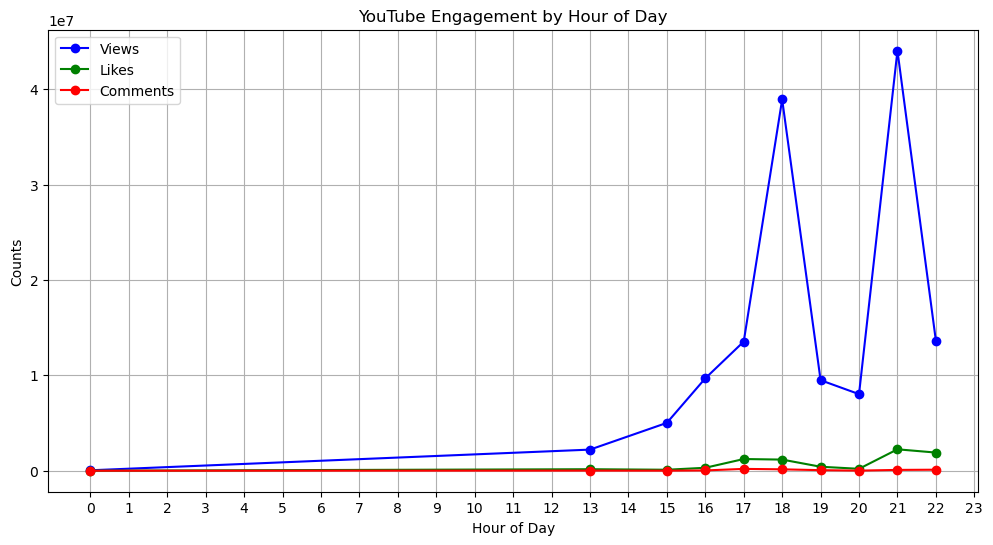

In [157]:
plt.figure(figsize=(12,6))
plt.plot(time_series.index, time_series['view_count'], label='Views', color='blue', marker='o')
plt.plot(time_series.index, time_series['like_count'], label='Likes', color='green', marker='o')
plt.plot(time_series.index, time_series['comment_count'], label='Comments', color='red', marker='o')


plt.xlabel("Hour of Day")
plt.ylabel("Counts")
plt.title("YouTube Engagement by Hour of Day")
plt.xticks(range(0,24))
plt.legend()
plt.grid(True)
plt.show()